# EDA On Online Retail transactions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px

# Importing Dataset

In [7]:
df =pd.read_csv(r"A:\Datasets\Online Retail.csv")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [8]:
#  InvoiceDate is in object we have convert it in datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [10]:
# Extract the date part from 'InvoiceDate' column
df['Invoice_Date'] = df['InvoiceDate'].dt.date
# Create new column with hour, minute, and second components
df['Time'] = df['InvoiceDate'].dt.strftime('%H:%M:%S')
df['year'] = df['InvoiceDate'].dt.year

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Time,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,08:26:00,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,08:26:00,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,08:26:00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,08:26:00,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,08:26:00,2010


In [12]:
df.drop(['InvoiceDate'],axis=1,inplace=True)

In [13]:
df.shape


(541909, 10)

In [14]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description     1454
Quantity           0
UnitPrice          0
CustomerID         0
Country            0
Invoice_Date       0
Time               0
year               0
dtype: int64

In [15]:
(df.isnull().mean().sort_values(ascending=False))*100

Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
UnitPrice       0.000000
CustomerID      0.000000
Country         0.000000
Invoice_Date    0.000000
Time            0.000000
year            0.000000
dtype: float64

In [16]:
data=df.dropna()

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Time,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,2010-12-01,08:26:00,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,2010-12-01,08:26:00,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,2010-12-01,08:26:00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,2010-12-01,08:26:00,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,2010-12-01,08:26:00,2010


In [18]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Time,year
299983,A563186,B,Adjust bad debt,1,-11062.06,15287,United Kingdom,2011-08-12,14:51:00,2011
299984,A563187,B,Adjust bad debt,1,-11062.06,15287,United Kingdom,2011-08-12,14:52:00,2011


In [19]:
data = data.drop(data.index[data['UnitPrice'] < 0])

In [20]:
data.shape

(540453, 10)

In [21]:
data['Country'].value_counts()

United Kingdom          494022
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

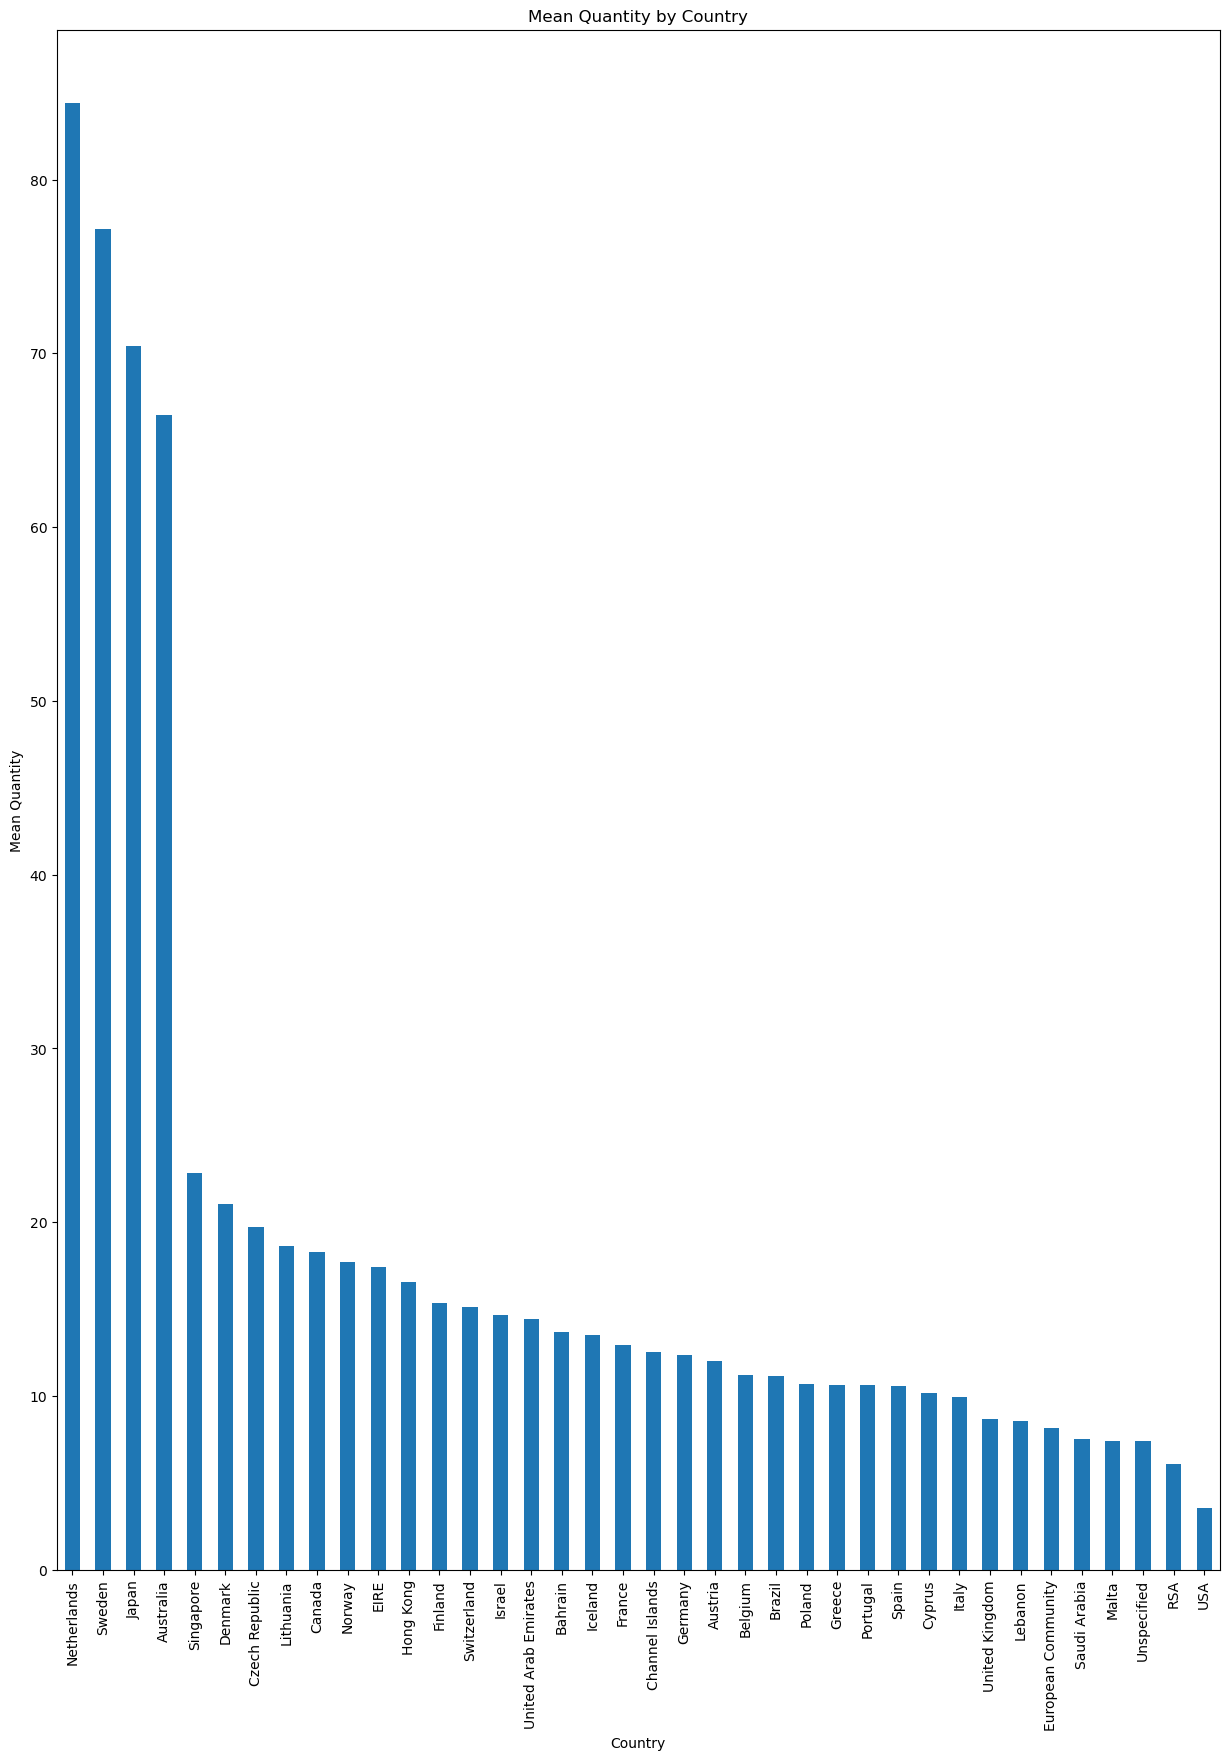

In [22]:
mean_quantity_by_country = data.groupby('Country')['Quantity'].mean().sort_values(ascending =False)
plt.figure(figsize=(15, 20))
mean_quantity_by_country.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Mean Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Mean Quantity')
plt.show()

In [24]:
data.dtypes

InvoiceNo        object
StockCode        object
Description      object
Quantity          int64
UnitPrice       float64
CustomerID        int64
Country          object
Invoice_Date     object
Time             object
year              int64
dtype: object

In [29]:
data['Invoice_Date'] = pd.to_datetime(data['Invoice_Date'])
data['year'] = pd.to_datetime(data['year'])

In [30]:
data['year'] = data['Invoice_Date'].dt.year

In [31]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Time,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,2010-12-01,08:26:00,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,2010-12-01,08:26:00,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,2010-12-01,08:26:00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,2010-12-01,08:26:00,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,2010-12-01,08:26:00,2010


In [32]:
data.groupby('year')['Quantity'].max()

year
2010     2880
2011    80995
Name: Quantity, dtype: int64

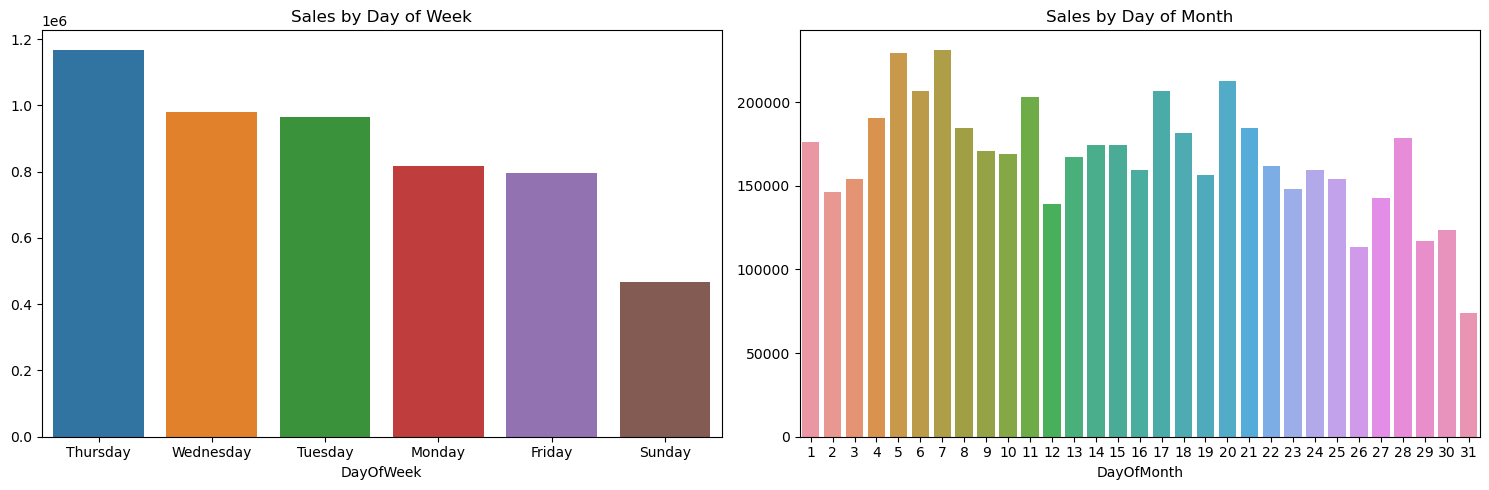

In [41]:


# Visualization of sales by days of the week and days of the month
data['DayOfWeek'] = data['Invoice_Date'].dt.day_name()
data['DayOfMonth'] = data['Invoice_Date'].dt.day
sales_by_day_of_week = data.groupby('DayOfWeek')['Quantity'].sum().sort_values(ascending=False)

sales_by_day_of_month = data.groupby('DayOfMonth')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x=sales_by_day_of_week.index, y=sales_by_day_of_week.values)
plt.title('Sales by Day of Week')

plt.subplot(1,2,2)
sns.barplot(x=sales_by_day_of_month.index, y=sales_by_day_of_month.values)
plt.title('Sales by Day of Month')

plt.tight_layout()
plt.show()